In [1]:
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from pprint import pprint

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
from networks.networks import *
from solver import Solver, load_solver
import data_visualization
import data_loader

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Files already downloaded and verified
Files already downloaded and verified


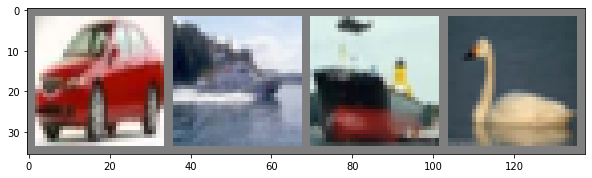

       car     ship     ship     bird


In [4]:
batch_size = 4
subset_size = 120
random_labels = False
#trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=4, subset_indices=subset_indices)

trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=batch_size, subset_size=subset_size, random_labels=random_labels)
testloader = data_loader.get_CIFAR10_testset_loader(batch_size=batch_size, subset_size=subset_size)

classes = data_loader.get_CIFAR10_classes()

data_visualization.show_samples(trainloader, classes)

In [5]:
net = ExampleNet()
# net = models.vgg16(pretrained=False)

# testloader=None
solver = Solver(net, trainloader, validationloader=testloader, optim = 'adam')

In [6]:
solver.train(num_epochs=10, log_every=4, plot=True, verbose=False)

Loading BokehJS ...

In [15]:
layers = extract_per_layer_weights(solver.model)

Layer "pool" has no weights


In [16]:
pprint(layers)

{'conv1': array([[[[ 0.15839934,  0.12623796, -0.0090924 ,  0.0565231 ,
          -0.00855659],
         [-0.09032947,  0.00423533,  0.06843425, -0.0234294 ,
           0.07988679],
         [-0.13016406, -0.09871317, -0.02774311,  0.05184398,
           0.06655103],
         [-0.08872735, -0.10871419,  0.01406237, -0.09297226,
          -0.14365071],
         [-0.08579718, -0.14212611, -0.14356123, -0.02597145,
          -0.12860069]],

        [[ 0.15140405,  0.14674215,  0.09435968,  0.02893543,
           0.06883403],
         [ 0.05098306, -0.02668611,  0.02109959,  0.13510197,
          -0.01501828],
         [-0.06035302, -0.0506101 , -0.00389511, -0.05269103,
          -0.06532115],
         [ 0.06551053,  0.04663562, -0.07618298, -0.11726769,
           0.03415852],
         [-0.12528123,  0.05322625, -0.13288243, -0.11618283,
          -0.11404104]],

        [[ 0.12187868,  0.09928982, -0.00746742,  0.14576896,
           0.09884163],
         [ 0.04338479, -0.0059876 , -0.0

In [18]:
from norms import l2_norm
l2_norm_result = l2_norm(layers) 
print(l2_norm_result)

12.724879264831543
33.054443359375
232.88787841796875
132.26657104492188
23.29292869567871
301789826.1818509
